# Vaccine Frequency

The aim of this analysis is to identify the mention of vaccine by countries over time. Mention of the term vaccine and relevant terms can be seen from the topic modelling exercise that I did earlier.

**NOTE: This notebook has been revised after Xiaohang's work. Please review file titled `Vaccine Frequency - XiaoHang - Rework Tashfeen`**

In [20]:
import pandas as pd # For dataframe analysis
import numpy as np
import re # Regix to remove punctuation from strings I split
from sklearn.feature_extraction.text import CountVectorizer # For creating document-term matrix & excluding stop words
from sklearn.feature_extraction import text # For getting stop words
import matplotlib.pyplot as plt # For graphs
import seaborn as sns # For graphs
%matplotlib inline

In [3]:
wordList = ['vaccine', 'vaccinations', 'vaccination', 'immunisation', 'immunity']
yearMonths = ['201912', '202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008']
yearMonthsWord = ['Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020']


In [2]:
# Process

# Get Dfs
# DTM Function
# Normalization based on shape
# DFs
# Combined Freq
# CSV Export for viz
# Plots for each country

In [4]:
df = pd.read_csv('covid_cleandf.csv')

In [5]:
def cleanTextInDf(mystring):
    mystring = mystring.lower() # Text normalization: make string lowercase
    mystring = re.sub(r'[^\w\s]','', mystring) # Text normalization: remove punctuation
    return mystring

In [6]:
def checkYearMonth(row):
    value = row['date']
    return str(value)[0:6]

In [14]:
def combinedTextForCountryDf(country):
    index = 0
    dfCountryYrList = []
    
    for ym in yearMonths:
        combinedText = ' '.join(df[(df['yearmonth'] == ym) & (df['country'] == country)].text)
        numRows, numCols = df[(df['yearmonth'] == ym) & (df['country'] == country)].shape
        dictCountryYr = {'country': country, 'yearmonth': ym, 'text': combinedText, 'shape': numRows}
        dfCountryYrList.append(dictCountryYr)
    return dfCountryYrList

In [8]:
# Cleaning the dataframe
cleanText = lambda text: cleanTextInDf(text) # Lambda function applies to all cells in a column
cleandf = pd.DataFrame(df.text.apply(cleanText)) # .apply() the function to all cells
df['text'] = cleandf['text']
df['yearmonth'] = df.apply(checkYearMonth, axis=1)
df

,name,path,country,network,date,token_freq,text,yearmonth
0,20191204_AE_KhaleejTimes_GDELT75493.txt,Raw text/AEClean/20191204_AE_KhaleejTimes_GDEL...,AE,KhaleejTimes,20191204,16,wknd inspired living kt home videos interactiv...,201912
1,20191214_TR_AnadoluAgency_NEXIS720304.txt,Raw text/TRClean/20191214_TR_AnadoluAgency_NEX...,TR,AnadoluAgency,20191214,4,virus transmitted to people from wild animals ...,201912
2,20191218_US_TheNewHumanitarian_GNAPI57383.txt,Raw text/USClean/20191218_US_TheNewHumanitaria...,US,TheNewHumanitarian,20191218,4,the humanitarian sector has a trust problem th...,201912
3,20191218_US_USAToday_GNAPI57390.txt,Raw text/USClean/20191218_US_USAToday_GNAPI573...,US,USAToday,20191218,7,alabama mobile researchers from the university...,201912
4,20191222_AE_KhaleejTimes_GDELT119076.txt,Raw text/AEClean/20191222_AE_KhaleejTimes_GDEL...,AE,KhaleejTimes,20191222,12,wknd inspired living kt home videos interactiv...,201912
...,...,...,...,...,...,...,...,...
12825,20200819_KW_KUNA_GDELT162457.txt,Raw text/KWClean/20200819_KW_KUNA_GDELT162457.txt,KW,KUNA,20200819,6,loc23272027 gmt kuwait april 23 kuna un secret...,202008
12826,20200819_KW_KUNA_GDELT169766.txt,Raw text/KWClean/20200819_KW_KUNA_GDELT169766.txt,KW,KUNA,20200819,3,loc15121212 gmt rome april 26 kuna the kuwaiti...,202008
12827,20200819_KW_KUNA_GDELT174322.txt,Raw text/KWClean/20200819_KW_KUNA_GDELT174322.txt,KW,KUNA,20200819,5,loc02532353 gmt kuwait march 6 kuna the kuwait...,202008
12828,20200819_KW_KUNA_GDELT176072.txt,Raw text/KWClean/20200819_KW_KUNA_GDELT176072.txt,KW,KUNA,20200819,6,loc00002100 gmt new york march 23 kuna in an a...,202008


In [15]:
countryYrList = combinedTextForCountryDf('AE') # This function combines text and returns a list
countryYrDf = pd.DataFrame(countryYrList) # convert list to dataframe
countryYrDf # Show the data frame

,country,yearmonth,text,shape
0,AE,201912,wknd inspired living kt home videos interactiv...,7
1,AE,202001,wknd inspired living kt home videos interactiv...,5
2,AE,202002,wknd inspired living kt home videos interactiv...,23
3,AE,202003,international experts are questioning the scal...,160
4,AE,202004,over 50 deaths have been reported in iraq maki...,305
5,AE,202005,hamas has reportedly allowed medical teams fro...,179
6,AE,202006,uk pledges 160m in yemen aid before donor conf...,135
7,AE,202007,dubai 30th june 2020 wam as part of its keenne...,109
8,AE,202008,dubai 2nd august 2020 wam nasser bin thani al ...,41


In [16]:
# Using built-in vocabulary for stop words.
# See https://scikit-learn.org/stable/modules/feature_extraction.html#stop-words
vectorizer = CountVectorizer(stop_words='english')
dataVectorizer = vectorizer.fit_transform(countryYrDf.text)
dataDtm = pd.DataFrame(dataVectorizer.toarray(), columns = vectorizer.get_feature_names())
dataDtm.index = countryYrDf.index # lets get the indices from previous dataframe
dataDtm = dataDtm.transpose() # Take a transpose
dataDtm # Take a look at the matrix

,0,1,2,3,4,5,6,7,8
000,0,0,0,0,1,0,0,0,0
001,0,0,0,0,1,0,0,0,0
0011,0,0,0,1,0,0,0,0,0
0017,0,0,0,0,1,0,0,0,0
0029,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
يأمر,0,0,0,1,0,0,0,0,0
يتعب,0,0,0,0,0,0,0,1,0
يد,0,0,0,1,0,0,0,0,0
يعبر,0,0,0,2,0,0,0,0,0


In [17]:
dataTf = dataDtm.transpose()[wordList]
dataTf

,vaccine,vaccinations,vaccination,immunisation,immunity
0,2,0,0,0,0
1,1,0,0,0,0
2,3,0,1,0,0
3,12,3,0,0,5
4,37,5,3,1,5
5,32,4,5,1,12
6,41,1,0,7,0
7,42,1,0,1,4
8,25,1,4,1,2


In [18]:
dataTf["sum"] = dataTf.sum(axis=1)
dataTf

,vaccine,vaccinations,vaccination,immunisation,immunity,sum
0,2,0,0,0,0,2
1,1,0,0,0,0,1
2,3,0,1,0,0,4
3,12,3,0,0,5,20
4,37,5,3,1,5,51
5,32,4,5,1,12,54
6,41,1,0,7,0,49
7,42,1,0,1,4,48
8,25,1,4,1,2,33


In [23]:
dataTf['normalized_sum'] = dataTf["sum"]/countryYrDf['shape']
dataTf

,vaccine,vaccinations,vaccination,immunisation,immunity,sum,normalized_sum
0,2,0,0,0,0,2,0.285714
1,1,0,0,0,0,1,0.200000
2,3,0,1,0,0,4,0.173913
3,12,3,0,0,5,20,0.125000
4,37,5,3,1,5,51,0.167213
5,32,4,5,1,12,54,0.301676
6,41,1,0,7,0,49,0.362963
7,42,1,0,1,4,48,0.440367
8,25,1,4,1,2,33,0.804878


Text(0.5, 1.0, 'Vaccine')

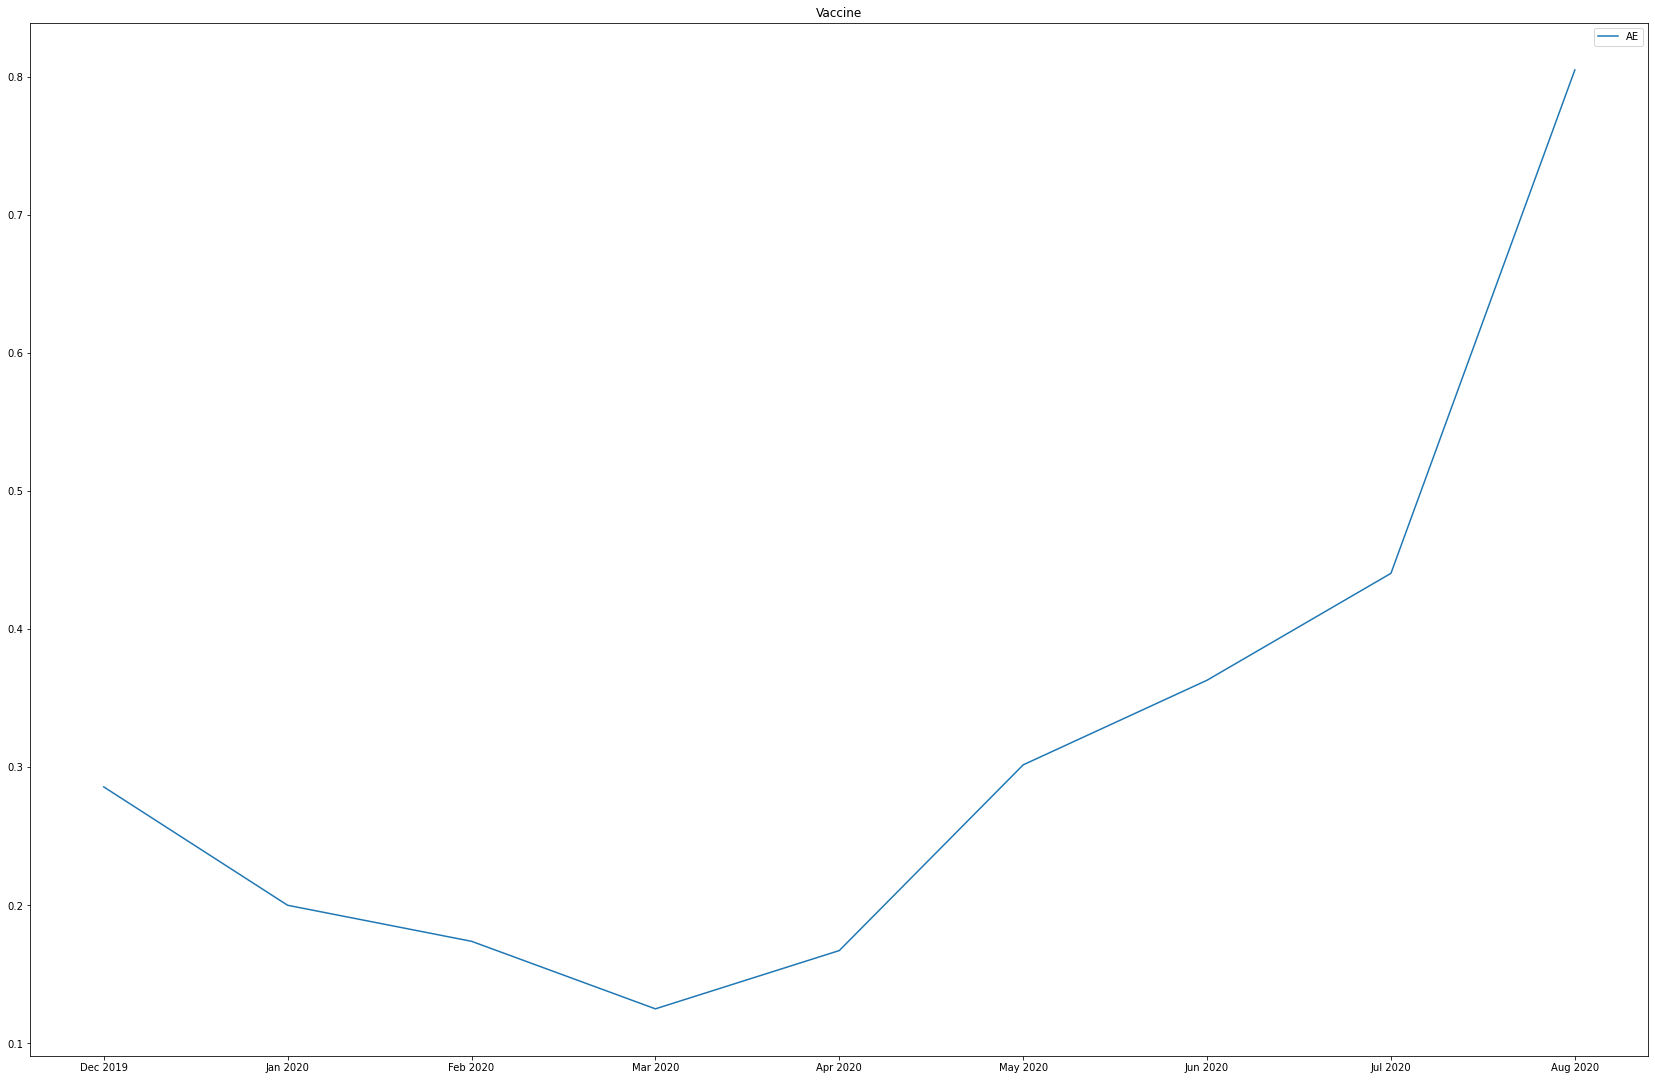

In [27]:
plt.figure(figsize=(29, 19))
# plt.subplot(4, 3, index+1)
plt.plot(yearMonthsWord, dataTf['normalized_sum'], label='AE')
# plt.plot(years, dataTfUK[col], label='UK')
plt.legend()
plt.title('Vaccine') # make the term the title

In [28]:
def getDTM(country):
    countryYrList = combinedTextForCountryDf(country) # This function combines text and returns a list
    countryYrDf = pd.DataFrame(countryYrList) # convert list to dataframe
    vectorizer = CountVectorizer(stop_words='english')
    dataVectorizer = vectorizer.fit_transform(countryYrDf.text)
    dataDtm = pd.DataFrame(dataVectorizer.toarray(), columns = vectorizer.get_feature_names())
    dataDtm.index = countryYrDf.index # lets get the indices from previous dataframe
    dataDtm = dataDtm.transpose() # Take a transpose
    dataTf = dataDtm.transpose()[wordList]
    dataTf["sum"] = dataTf.sum(axis=1)
    dataTf['normalized_sum'] = dataTf["sum"]/countryYrDf['shape']
    return dataTf

In [29]:
tfDe = getDTM('DE')
tfUS = getDTM('US')
tfUK = getDTM('UK')

In [30]:
tfAe = getDTM('AE')
tfQa = getDTM('QA')

In [31]:
tfCn = getDTM('CN')

In [32]:
wordList = ['vaccine']
tfKw = getDTM('KW')

In [33]:
wordList = ['vaccine', 'vaccination', 'immunization', 'immunity']
tfRu = getDTM('RU')

In [34]:
wordList = ['vaccine', 'vaccinations', 'vaccination', 'immunization', 'immunity']
tfTr = getDTM('TR')

In [35]:
wordList = ['vaccine', 'vaccinations', 'vaccination', 'immunization', 'immunity']
tfIr = getDTM('IR')

In [36]:
# default state
wordList = ['vaccine', 'vaccinations', 'vaccination', 'immunisation', 'immunity']

Text(0.5, 1.0, 'Mention of Vaccine and Related Words')

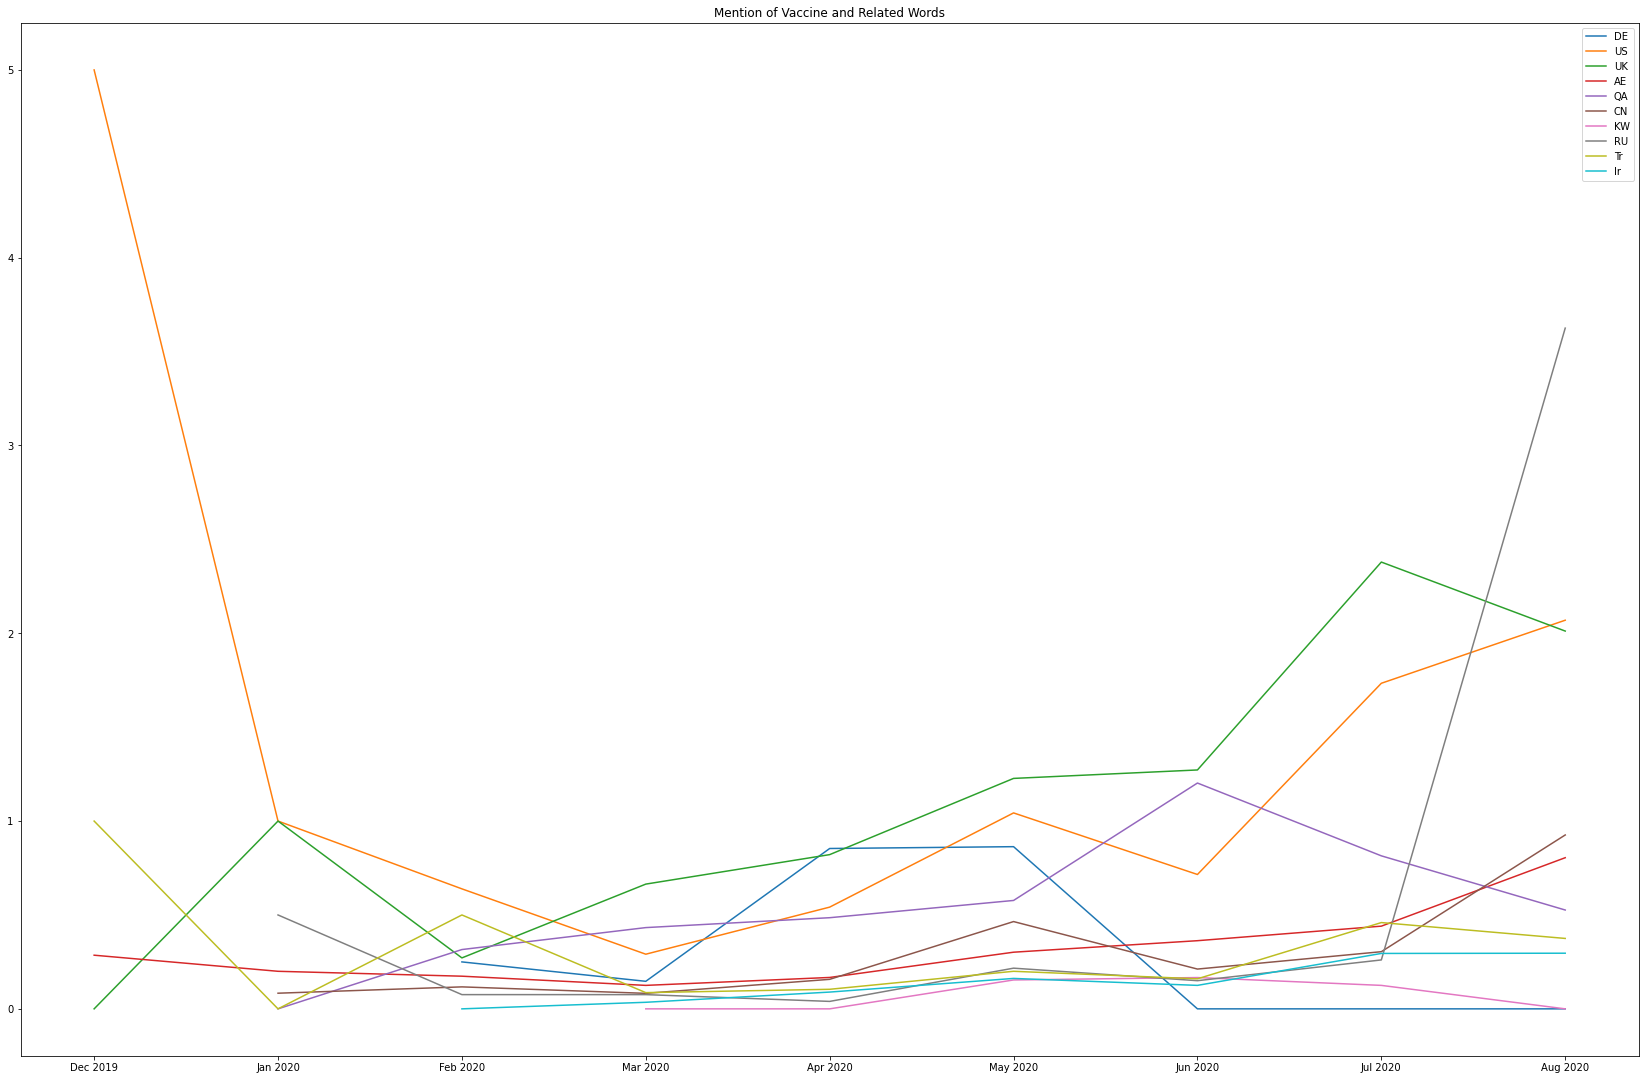

In [55]:
plt.figure(figsize=(29, 19))
# plt.subplot(4, 3, index+1)
plt.plot(yearMonthsWord, tfDe['normalized_sum'], label='DE')
plt.plot(yearMonthsWord, tfUS['normalized_sum'], label='US')
plt.plot(yearMonthsWord, tfUK['normalized_sum'], label='UK')
plt.plot(yearMonthsWord, tfAe['normalized_sum'], label='AE')
plt.plot(yearMonthsWord, tfQa['normalized_sum'], label='QA')
plt.plot(yearMonthsWord, tfCn['normalized_sum'], label='CN')
plt.plot(yearMonthsWord, tfKw['normalized_sum'], label='KW')
plt.plot(yearMonthsWord, tfRu['normalized_sum'], label='RU')
plt.plot(yearMonthsWord, tfTr['normalized_sum'], label='Tr')
plt.plot(yearMonthsWord, tfIr['normalized_sum'], label='Ir')
plt.legend()
plt.title('Mention of Vaccine and Related Words') # make the term the title

In [41]:
arr = tfIr["normalized_sum"].to_numpy()
arr

array([       nan,        nan, 0.        , 0.03497942, 0.08932462,
       0.16201117, 0.125     , 0.29508197, 0.2962963 ])

In [42]:
tfIr

,vaccine,vaccinations,vaccination,immunization,immunity,sum,normalized_sum
0,0,0,0,0,0,0,NaN
1,0,0,0,0,0,0,NaN
2,0,0,0,0,0,0,0.000000
3,11,0,0,1,5,17,0.034979
4,31,0,3,0,7,41,0.089325
5,18,1,1,2,7,29,0.162011
6,8,0,0,1,1,10,0.125000
7,15,0,0,1,2,18,0.295082
8,8,0,0,0,0,8,0.296296


In [43]:
arr = tfTr["normalized_sum"].to_numpy()
arr

array([1.        , 0.        , 0.5       , 0.08641975, 0.10416667,
       0.2       , 0.16      , 0.45945946, 0.375     ])

In [45]:
tfTr

,vaccine,vaccinations,vaccination,immunization,immunity,sum,normalized_sum
0,1,0,0,0,0,1,1.000000
1,0,0,0,0,0,0,0.000000
2,2,0,0,0,0,2,0.500000
3,6,0,0,0,1,7,0.086420
4,10,0,5,0,0,15,0.104167
5,13,2,0,0,3,18,0.200000
6,8,0,0,0,0,8,0.160000
7,6,2,4,1,4,17,0.459459
8,4,0,2,0,0,6,0.375000


In [46]:
arr = tfRu["normalized_sum"].to_numpy()
arr

array([       nan, 0.5       , 0.07575758, 0.07575758, 0.03968254,
       0.21666667, 0.15      , 0.2605042 , 3.625     ])

In [54]:
tfRu

,vaccine,vaccination,immunization,immunity,sum,normalized_sum
0,0,0,0,0,0,NaN
1,2,0,0,0,2,0.500000
2,5,0,0,0,5,0.075758
3,14,0,0,1,15,0.075758
4,10,1,1,3,15,0.039683
5,34,0,3,2,39,0.216667
6,12,1,0,2,15,0.150000
7,15,3,1,12,31,0.260504
8,81,1,0,5,87,3.625000


In [47]:
arr = tfKw["normalized_sum"].to_numpy()
arr

array([       nan,        nan,        nan, 0.        , 0.        ,
       0.15384615, 0.16666667, 0.125     , 0.        ])

In [48]:
arr = tfCn["normalized_sum"].to_numpy()
arr

array([       nan, 0.08333333, 0.11702128, 0.0826087 , 0.15718157,
       0.46478873, 0.21186441, 0.30434783, 0.92592593])

In [49]:
arr = tfQa["normalized_sum"].to_numpy()
arr

array([       nan, 0.        , 0.31578947, 0.43269231, 0.48538012,
       0.57723577, 1.20253165, 0.81481481, 0.52631579])

In [50]:
arr = tfAe["normalized_sum"].to_numpy()
arr

array([0.28571429, 0.2       , 0.17391304, 0.125     , 0.16721311,
       0.30167598, 0.36296296, 0.44036697, 0.80487805])

In [51]:
arr = tfDe["normalized_sum"].to_numpy()
arr

array([       nan,        nan, 0.25      , 0.14666667, 0.85393258,
       0.86363636, 0.        , 0.        , 0.        ])

In [52]:
arr = tfUK["normalized_sum"].to_numpy()
arr

array([0.        , 1.        , 0.27131783, 0.6642984 , 0.82130178,
       1.22713864, 1.2721519 , 2.37919463, 2.01176471])

In [53]:
arr = tfUS["normalized_sum"].to_numpy()
arr

array([5.        , 1.        , 0.63902439, 0.29101796, 0.54173765,
       1.04341085, 0.71554252, 1.73374613, 2.06951872])